In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the csv
customer_df = pd.read_csv('customer_value_analysis.csv')


In [20]:
# Display the first 5 rows
# print(customer_df.head())

# Display the shape 
# print(customer_df.shape)

# Display df information
#display(customer_df.info())
display(customer_df)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [21]:
# Rename columns to follow snake case
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

# Check NaN values per column
print(customer_df.isna().sum())

# Drop any ID column if exists
id_col = 'customer'  
if id_col in customer_df.columns:
    customer_df = customer_df.drop(columns=[id_col])

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [22]:
# Function to separate numerical and categorical columns
def separate_data_types(df):
    numerical_df = df.select_dtypes(include=[np.number])
    categorical_df = df.select_dtypes(exclude=[np.number])
    return numerical_df, categorical_df

In [23]:
# Separate the dataframe
numerical_df, categorical_df = separate_data_types(customer_df)

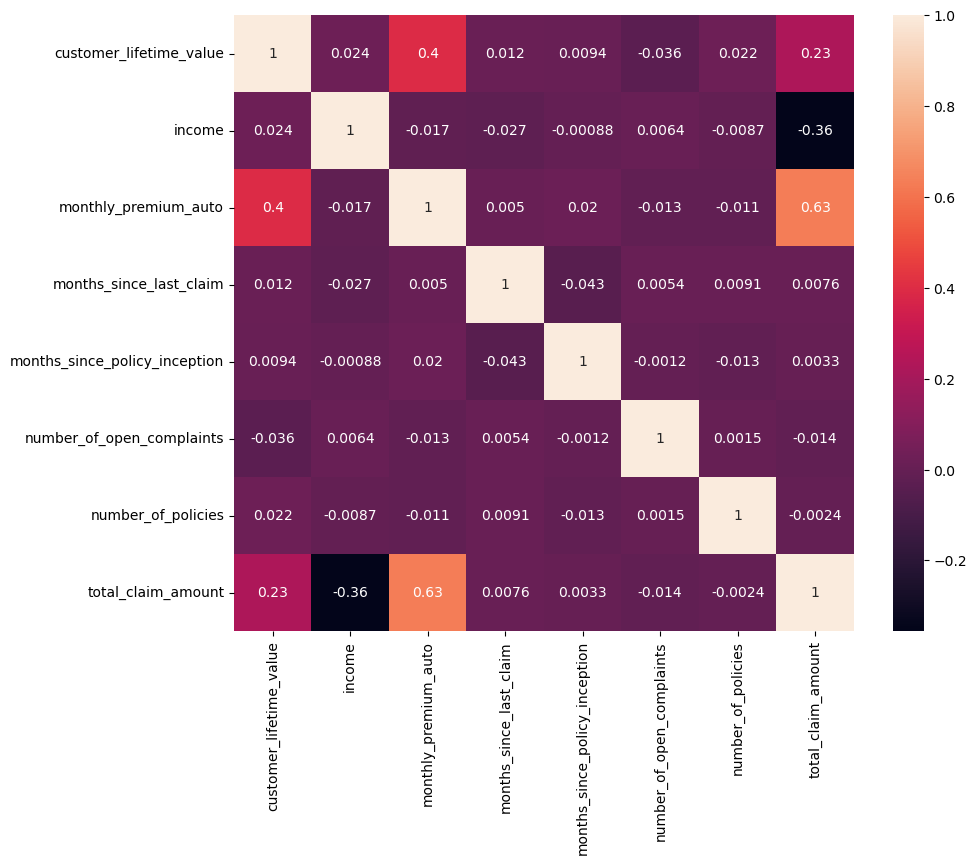

In [25]:
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Size of the figure
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#Pair with highest correlation visually is: monthly_premium_auto VS total_claim_amount
#with a correlation value of : 0.63

In [28]:
display(numerical_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [39]:
def discrete_or_continuous(df, threshold=36):
    # create empty df
    discrete_df = pd.DataFrame()
    continuous_df = pd.DataFrame()
    
    # for all collumns check if unique with 36 threshold and triage discrete vs continous
    for col in df.columns:
        if df[col].nunique() > threshold:
            continuous_df[col] = df[col]
        else:  
            discrete_df[col] = df[col]
    
    return discrete_df, continuous_df

In [37]:

discrete_df, continuous_df = discrete_or_continuous(numerical_df)

In [38]:
display(discrete_df)

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


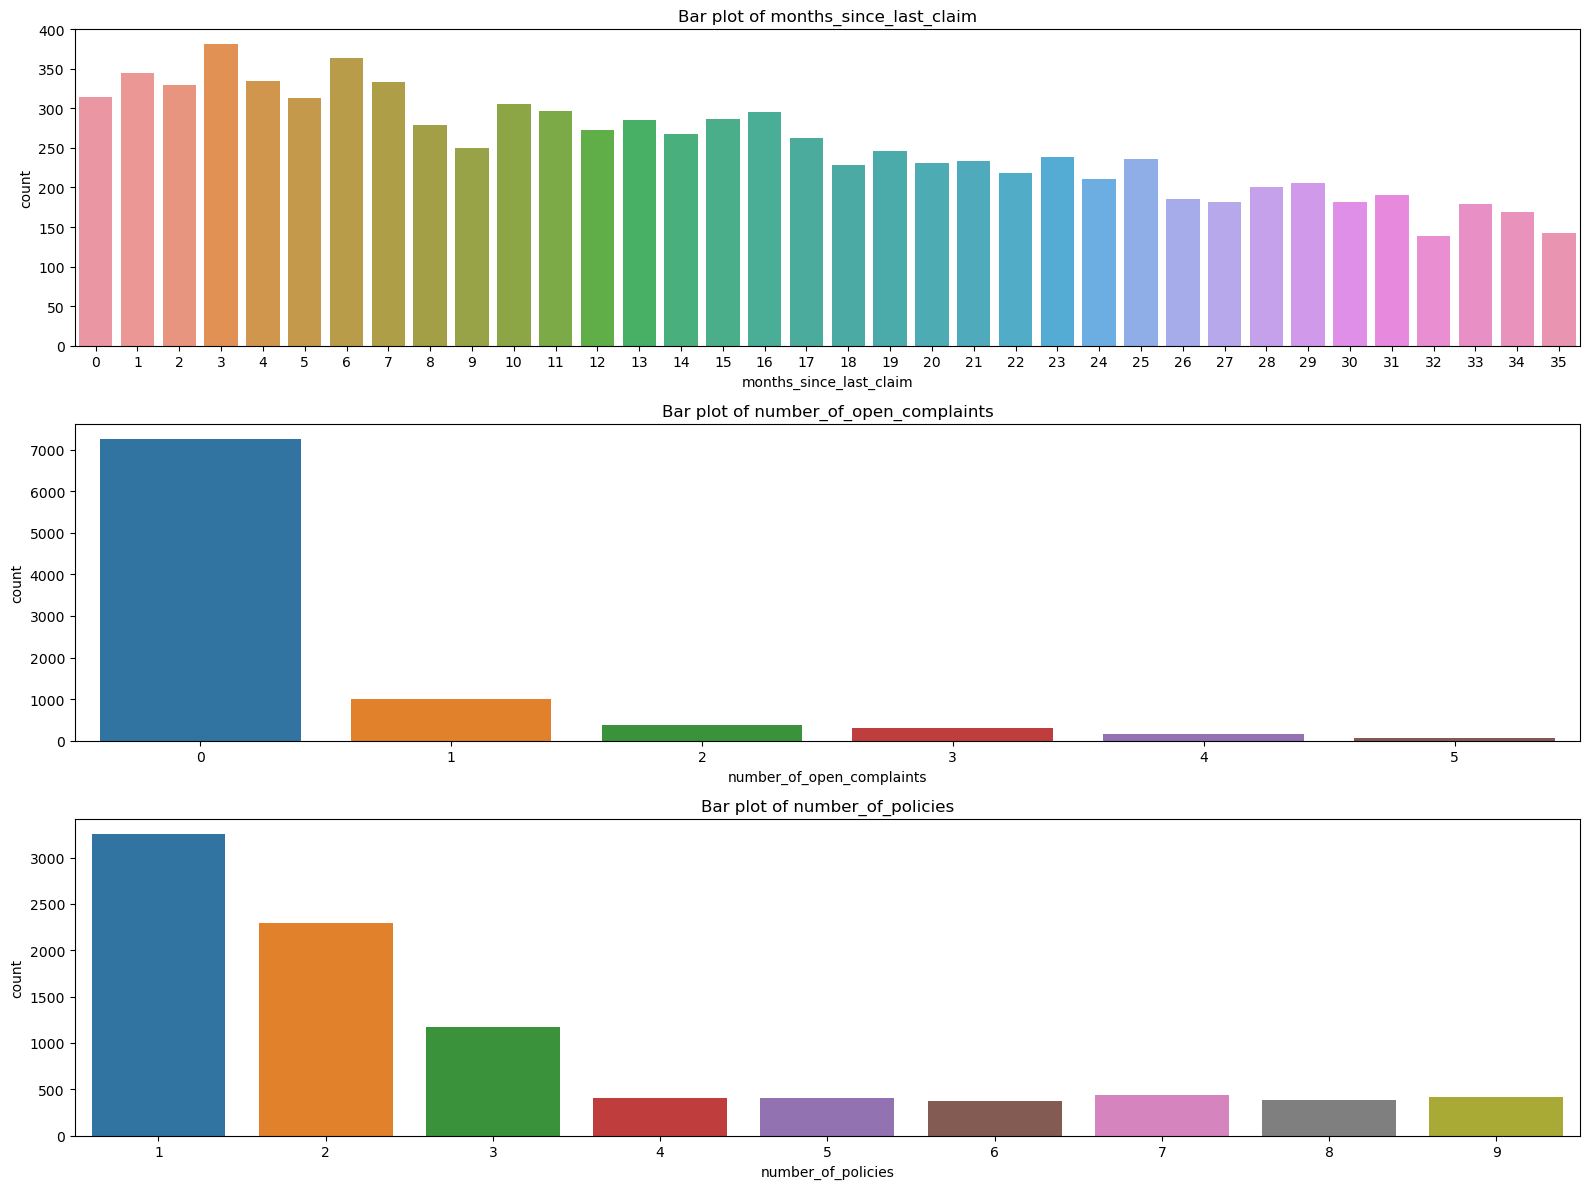

In [41]:
def plot_discrete_bars(df):
    """
    Creates bar plots for all columns in a discrete dataframe.

    Parameters:
    df (DataFrame): DataFrame containing discrete data.
    """
    num_cols = len(df.columns)
    fig_height = num_cols * 4
    fig, axes = plt.subplots(num_cols, 1, figsize=(16, fig_height))

    for i, col in enumerate(df.columns):
        sns.countplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Bar plot of {col}')

    plt.tight_layout()
    plt.show()

# display discrete columns
plot_discrete_bars(discrete_df)

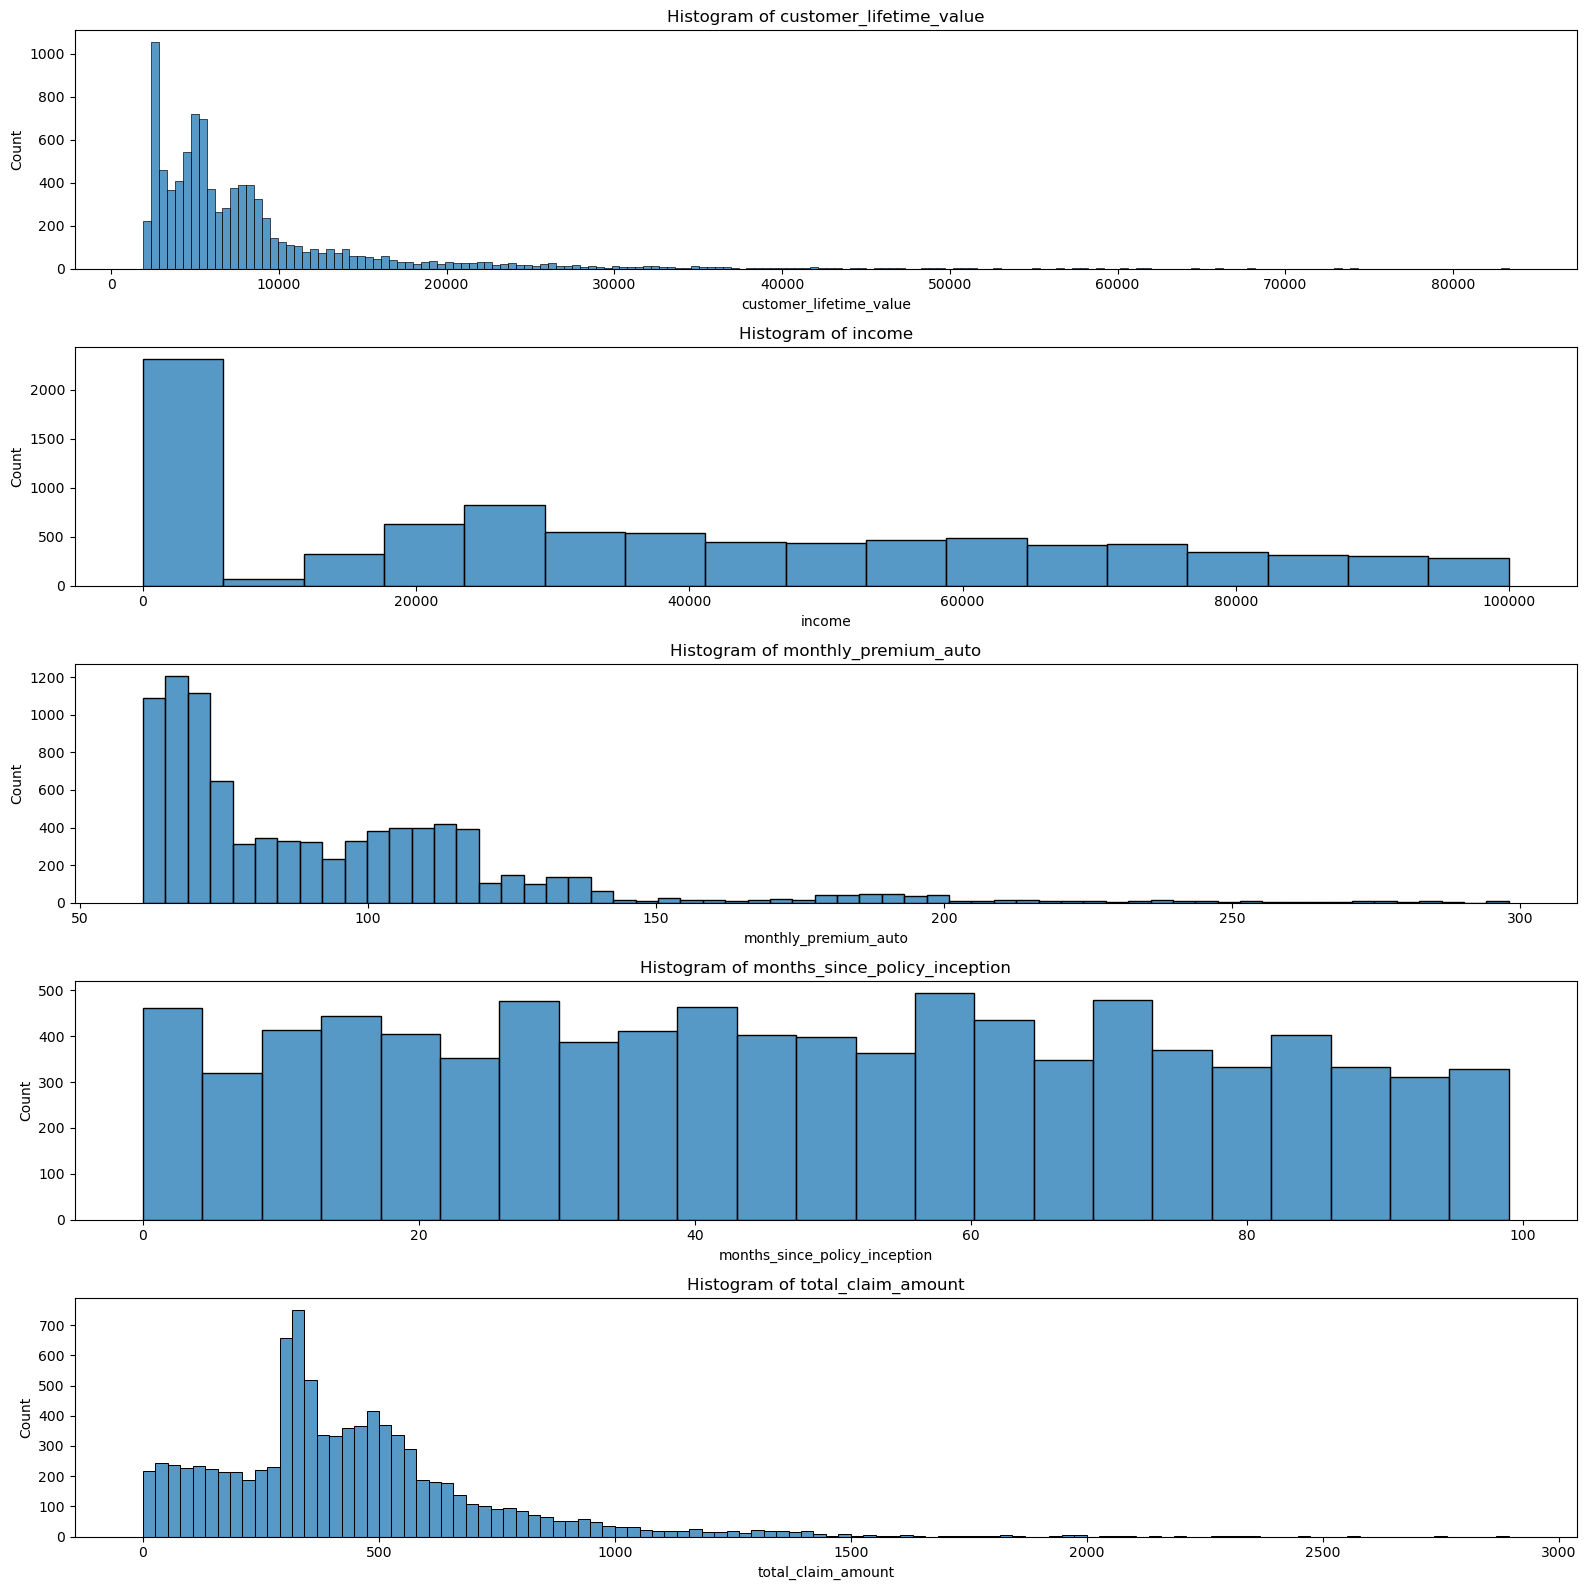

In [43]:
def plot_continuous_histograms(df):
    """
    Creates histograms for all columns in a continuous dataframe.

    Parameters:
    df (DataFrame): DataFrame containing continuous data.
    """
    num_cols = len(df.columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=(16, 16))

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

# Display continuous values
plot_continuous_histograms(continuous_df)

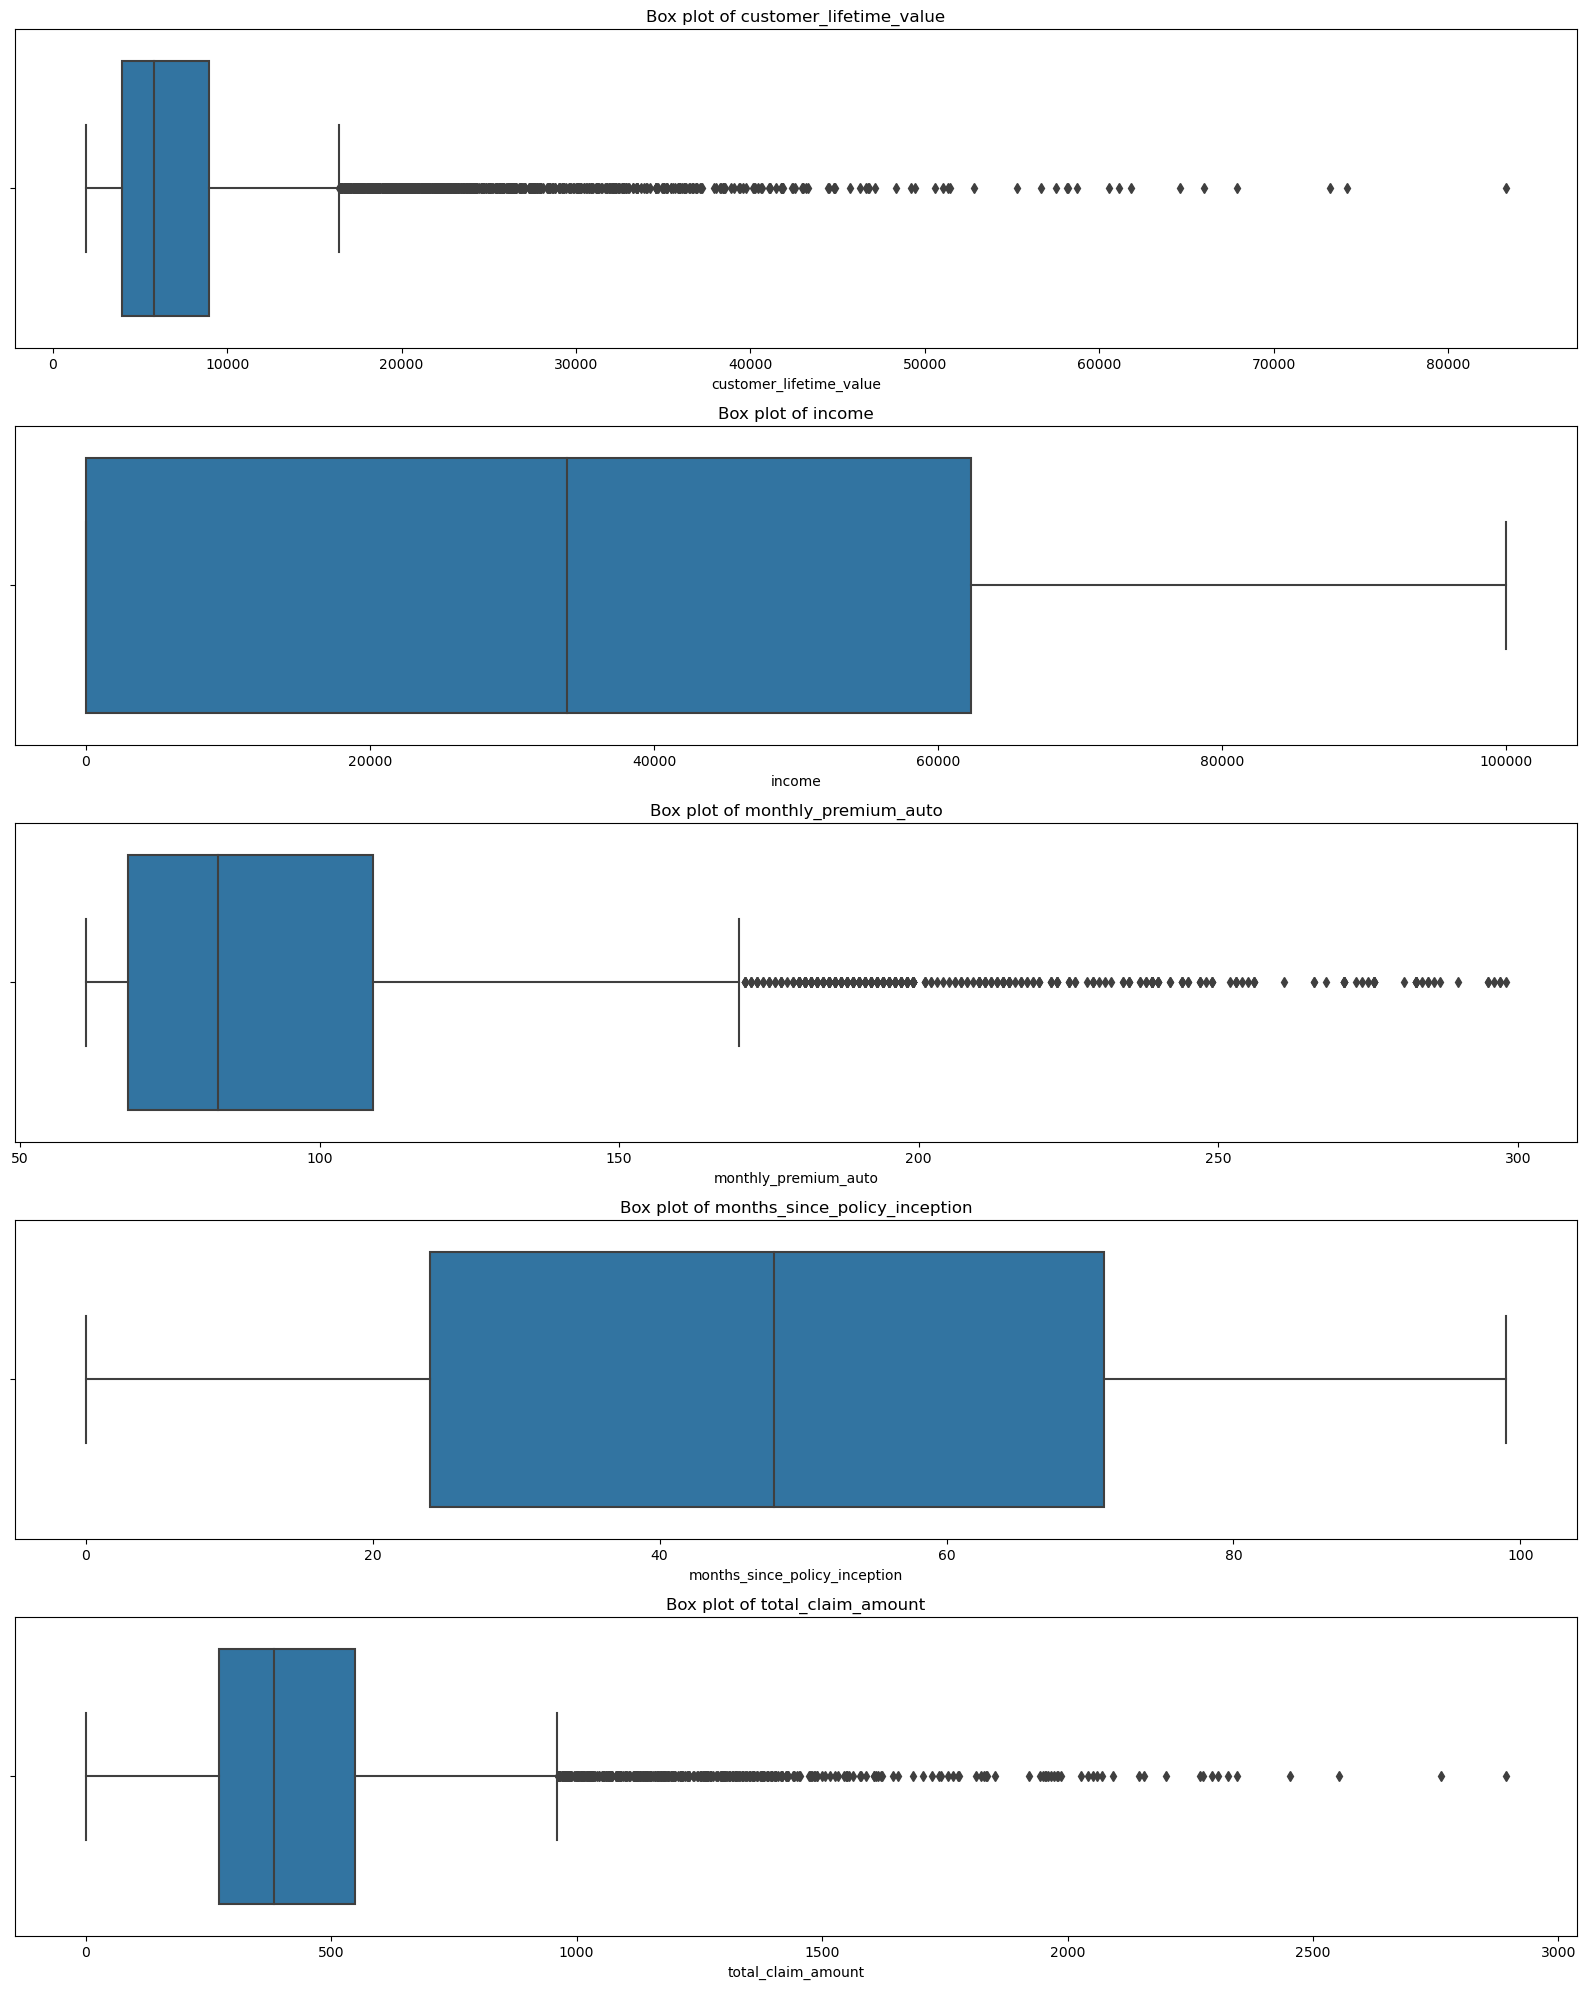

In [44]:
def plot_continuous_boxplots(df):
    """
    Creates box plots for all continuous variables in the dataframe to check for outliers.

    Parameters:
    df (DataFrame): DataFrame containing continuous data.
    """
    num_cols = len(df.columns)
    # Adjust the size of the figure depending on the number of columns
    fig_height = num_cols * 4
    fig, axes = plt.subplots(num_cols, 1, figsize=(16, fig_height))

    for i, col in enumerate(df.columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Box plot of {col}')

    plt.tight_layout()
    plt.show()

# displaying boxplot
plot_continuous_boxplots(continuous_df)



In [ ]:
#    According to the previous histogram plots, do you think that you will have to apply any transformation?

#Yes, by removing outliers in customer_lifetime_value (over 60k), monthly_premium_uto (probably above 250)
#and maybe in total claim amount over 2200 !